___
# Ciência dos Dados - PROJETO 1

## Ester dos Santos Quintino
___

## Como o nível de escolaridade dos pais afetam o índice de trabalho infantil em determinada região?


___
## Introdução

Descreva aqui o que pretende analisar!

Capriche no português!! 
Se quiser pode utilizar pesquisas semelhantes publicadas em sites confiáveis!!


___
## Filtros da base de dados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Ester Quintino\Desktop\Projeto1CDDP


In [3]:
#Se usar o arquivo descompactado
#pd.read_csv('PES2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

# lendo a PNAD

In [4]:
dados=pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')
dados.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,0,2015,11,15,1,1,2,27,2,1992,...,1.0,800.0,4.0,5,1.0,2.0,2.0,1.0,800.0,20161117
1,1,2015,11,15,3,1,4,4,5,1992,...,1.0,1150.0,4.0,5,1.0,2.0,2.0,1.0,1150.0,20161117
2,2,2015,11,15,4,1,4,4,1,1980,...,6.0,793.0,4.0,6,1.0,2.0,2.0,1.0,793.0,20161117
3,3,2015,11,15,4,2,2,5,6,1981,...,6.0,793.0,4.0,7,1.0,2.0,2.0,1.0,793.0,20161117
4,4,2015,11,15,4,3,4,8,4,2004,...,6.0,793.0,4.0,2,2.0,NaN,NaN,2.0,793.0,20161117


# Filtragem das Colunas

In [5]:
dados_resumidos=dados.loc[:,["V4801","V0401","V4728","V4743","V0702","V0703","UF"]]#.dropna(axis=0)
dados_resumidos.head()

,V4801,V0401,V4728,V4743,V0702,V0703,UF
0,NaN,1,1,4.0,NaN,NaN,11
1,NaN,1,1,4.0,NaN,NaN,11
2,25.0,1,1,4.0,NaN,NaN,11
3,NaN,2,1,4.0,NaN,NaN,11
4,16.0,3,1,4.0,NaN,NaN,11


In [6]:
dados_não_nulos = dados_resumidos
dados_não_nulos=dados_não_nulos.fillna(0)
dados_não_nulos.head()
dados_não_nulos.head()

,V4801,V0401,V4728,V4743,V0702,V0703,UF
0,0.0,1,1,4.0,0.0,0.0,11
1,0.0,1,1,4.0,0.0,0.0,11
2,25.0,1,1,4.0,0.0,0.0,11
3,0.0,2,1,4.0,0.0,0.0,11
4,16.0,3,1,4.0,0.0,0.0,11


# Renomeando Linhas e Colunas

In [7]:
dados_não_nulos.UF=dados.UF.astype('category')
dados_não_nulos.UF.cat.categories=(["Rondônia","Acre","Amazonas","Roraima","Pará","Amapá","Tocantins","Maranhão","Piauí","Ceará","Rio Grande do Norte","Paraíba","Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espírito Santo","Rio de Janeiro","São Paulo","Paraná","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul","Mato Grosso","Goías","Distrito Federal"])
dados_não_nulos.loc[(dados_não_nulos.UF=="Rondônia")|(dados_não_nulos.UF=="Acre")|(dados_não_nulos.UF=="Amazonas")|
                    (dados_não_nulos.UF=="Roraima")|(dados_não_nulos.UF=="Pará")|(dados_não_nulos.UF=="Amapá")|
                    (dados_não_nulos.UF=="Tocantins")|(dados_não_nulos.UF=="Maranhão")|(dados_não_nulos.UF=="Piauí")|
                    (dados_não_nulos.UF=="Ceará")|(dados_não_nulos.UF=="Rio Grande do Norte")|(dados_não_nulos.UF=="Paraíba")|
                    (dados_não_nulos.UF=="Pernambuco")|(dados_não_nulos.UF=="Alagoas")|(dados_não_nulos.UF=="Sergipe")|
                    (dados_não_nulos.UF=="Bahia")|(dados_não_nulos.UF=="Minas Gerais")|(dados_não_nulos.UF=="Espírito Santo")|
                    (dados_não_nulos.UF=="Rio de Janeiro")|(dados_não_nulos.UF=="São Paulo")|(dados_não_nulos.UF=="Paraná")|
                    (dados_não_nulos.UF=="Santa Catarina")|(dados_não_nulos.UF=="Rio Grande do Sul")|
                    (dados_não_nulos.UF=="Mato Grosso do Sul")|(dados_não_nulos.UF=="Mato Grosso")|(dados_não_nulos.UF=="Goiás")|
                    (dados_não_nulos.UF=="Distrito Federal"),"Regiões"]="Brasil"
#dados_não_nulos=dados_não_nulos.dropna(axis=0) #Dropna:Eliminação dos NAN's.
dados_não_nulos = dados_não_nulos.drop(['Regiões'],axis=1)

dados_não_nulos.V4728=dados.V4728.astype('category')
dados_não_nulos.V4728.cat.categories = (["URBANA - Cidade ou vila, área urbanizada","URBANA - Cidade ou vila, área não urbanizada","URBANA - Área urbana isolada","RURAL - Aglomerado rural de extensão urbana ","RURAL - Aglomerado rural, isolado, povoado","RURAL - Aglomerado rural, isolado, núcleo","RURAL- Aglomerado rural, isolado, outros aglomerados", "RURAL - Zona rural exclusive aglomerado rural"])
dados_não_nulos.loc[(dados_não_nulos.UF=='Rondônia') | (dados_não_nulos.UF=='Acre') | (dados_não_nulos.UF=='Amazonas') | (dados_não_nulos.UF=='Roraima') | (dados_não_nulos.UF=='Pará') | (dados_não_nulos.UF=='Amapá') | (dados_não_nulos.UF=='Tocantins'),'Regiao'] = 'Norte'
dados_não_nulos.loc[(dados_não_nulos.UF=='Maranhão') | (dados_não_nulos.UF=='Piaui') | (dados_não_nulos.UF=='Caerá') | (dados_não_nulos.UF=='Rio Grande do Norte') | (dados_não_nulos.UF=='Paraíba') | (dados_não_nulos.UF=='Pernambuco') | (dados_não_nulos.UF=='Alagoas') | (dados_não_nulos.UF=='Sergipe') | (dados_não_nulos.UF=='Bahia'),'Regiao'] = 'Nordeste'
dados_não_nulos.loc[(dados_não_nulos.UF=='Minas Gerais') | (dados_não_nulos.UF=='Espirito Santo') | (dados_não_nulos.UF=='Rio de Janeiro') | (dados_não_nulos.UF=='São Paulo'),'Regiao'] = 'Sudeste'
dados_não_nulos.loc[(dados_não_nulos.UF=='Paraná') | (dados_não_nulos.UF=='Santa Catarina') | (dados_não_nulos.UF=='Rio Grande do Sul'),'Regiao'] = 'Sul'
dados_não_nulos.loc[(dados_não_nulos.UF=='Mato Grosso do Sul') | (dados_não_nulos.UF=='Mato Grosso') | (dados_não_nulos.UF=='Goiás') | (dados_não_nulos.UF=='Distrito Federal'),'Regiao'] = 'Centroeste'
dados_não_nulos.head()

,V4801,V0401,V4728,V4743,V0702,V0703,UF,Regiao
0,0.0,1,"URBANA - Cidade ou vila, área urbanizada",4.0,0.0,0.0,Rondônia,Norte
1,0.0,1,"URBANA - Cidade ou vila, área urbanizada",4.0,0.0,0.0,Rondônia,Norte
2,25.0,1,"URBANA - Cidade ou vila, área urbanizada",4.0,0.0,0.0,Rondônia,Norte
3,0.0,2,"URBANA - Cidade ou vila, área urbanizada",4.0,0.0,0.0,Rondônia,Norte
4,16.0,3,"URBANA - Cidade ou vila, área urbanizada",4.0,0.0,0.0,Rondônia,Norte


In [8]:
# V4801 : Nível de ensino, duração do ensino fundamental e série que frequentavam
# V0401 : Condição na unidade domiciliar
# V4728 : Condição Censitária
# V4743 : Faixa de rendimento mensal domiciliar per capita
# V0702 : Trabalho Rural
# V0703 : Trabalho Urbano
# UF : Unidade de Federação

In [9]:
dados_não_nulos=dados_não_nulos.rename(columns={'UF':'UF','V4801':'Nível_de_Ensino','V0401':'Condição_domiciliar',
                                               'V4728':'Condição_Censitária', 'V4743':'Renda', 'V0702':'Trabalho_Rural', 
                                              'V0703':'Trabalho_Urbano'})
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 1,'Condição_domiciliar'] = 'Pessoa de referência'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 2,'Condição_domiciliar'] = 'Cônjuge'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 3,'Condição_domiciliar'] = 'Filho'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 4,'Condição_domiciliar'] = 'Outro parente'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 5,'Condição_domiciliar'] = 'Agregado'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 6,'Condição_domiciliar'] = 'Pensionista'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 7,'Condição_domiciliar'] = 'Empregado doméstico'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 8,'Condição_domiciliar'] = 'Parente do empregado doméstico'

dados_não_nulos.loc[dados_não_nulos['Renda'] == 0,'Renda'] = 'Sem rendimento'
dados_não_nulos.loc[dados_não_nulos['Renda'] == 1,'Renda'] = 'Até 1/4 salário mínimo'
dados_não_nulos.loc[dados_não_nulos['Renda'] == 2,'Renda'] = 'Mais de 1/4 até 1/2 salário mínimo'
dados_não_nulos.loc[dados_não_nulos['Renda'] == 3,'Renda'] = 'Mais de 1/2 até 1 salário mínimo'
dados_não_nulos.loc[dados_não_nulos['Renda'] == 4,'Renda'] = 'Mais de 1 até 2 salário mínimo'
dados_não_nulos.loc[dados_não_nulos['Renda'] == 5,'Renda'] = 'Mais de 2 até 3 salário mínimo'
dados_não_nulos.loc[dados_não_nulos['Renda'] == 6,'Renda'] = 'Mais de 3 até 5 salário mínimo'
dados_não_nulos.loc[dados_não_nulos['Renda'] == 7,'Renda'] = 'Mais de 5 salário mínimo'
dados_não_nulos.loc[dados_não_nulos['Renda'] == 99,'Renda'] = 'Sem declaração'


dados_não_nulos.loc[dados_não_nulos['Trabalho_Rural'] == 2,'Trabalho_Rural'] = 'Sim'
dados_não_nulos.loc[dados_não_nulos['Trabalho_Rural'] == 4,'Trabalho_Rural'] = 'Não'
#dados_não_nulos.loc[dados_não_nulos['Trabalho_Rural'] == [] ,'Trabalho_Rural'] = 'Não aplicável'

dados_não_nulos.loc[dados_não_nulos['Trabalho_Urbano'] == 1,'Trabalho_Urbano'] = 'Sim'
dados_não_nulos.loc[dados_não_nulos['Trabalho_Urbano'] == 3,'Trabalho_Urbano'] = 'Não'
#dados_não_nulos.loc[dados_não_nulos['Trabalho_Urbano'] == [] ,'Trabalho_Urbano'] = 'Não aplicável'

dados_não_nulos.loc[dados_não_nulos['Nível_de_Ensino'] == 1,'Nível_de_Ensino'] = 'Maternal, jardim de infância etc.'
dados_não_nulos.loc[dados_não_nulos['Nível_de_Ensino'] == 2,'Nível_de_Ensino'] = 'Classe de alfabetização'
dados_não_nulos.loc[dados_não_nulos['Nível_de_Ensino'] == 3,'Nível_de_Ensino'] = 'Alfabetização de adultos'
dados_não_nulos.loc[dados_não_nulos['Nível_de_Ensino'] == 4,'Nível_de_Ensino'] = '1ª série do ensino fundamental regular em 8 anos'
dados_não_nulos.loc[dados_não_nulos['Nível_de_Ensino'] == 5,'Nível_de_Ensino'] = '2ª série do ensino fundamental regular em 8 anos'
dados_não_nulos.loc[dados_não_nulos['Nível_de_Ensino'] == 6,'Nível_de_Ensino'] = '3ª série do ensino fundamental regular em 8 anos'
dados_não_nulos.loc[dados_não_nulos['Nível_de_Ensino'] == 7,'Nível_de_Ensino'] = '4ª série do ensino fundamental regular em 8 anos'
dados_não_nulos.loc[dados_não_nulos['Nível_de_Ensino'] == 8,'Nível_de_Ensino'] = '5ª série do ensino fundamental regular em 8 anos'
dados_não_nulos.loc[dados_não_nulos['Nível_de_Ensino'] == 9,'Nível_de_Ensino'] = '6ª série do ensino fundamental regular em 8 anos'
dados_não_nulos.loc[dados_não_nulos['Nível_de_Ensino'] == 10,'Nível_de_Ensino'] = '7ª série do ensino fundamental regular em 8 anos'
dados_não_nulos.loc[dados_não_nulos['Nível_de_Ensino'] == 11,'Nível_de_Ensino'] = '8ª série do ensino fundamental regular em 8 anos'
dados_não_nulos.loc[dados_não_nulos['Nível_de_Ensino'] == 12,'Nível_de_Ensino'] = '1ª série do ensino fundamental regular em 9 anos'
dados_não_nulos.loc[dados_não_nulos['Nível_de_Ensino'] == 13,'Nível_de_Ensino'] = '2ª série do ensino fundamental regular em 9 anos'
dados_não_nulos.loc[dados_não_nulos['Nível_de_Ensino'] == 14,'Nível_de_Ensino'] = '3ª série do ensino fundamental regular em 9 anos'
dados_não_nulos.loc[dados_não_nulos['Nível_de_Ensino'] == 15,'Nível_de_Ensino'] = '4ª série do ensino fundamental regular em 9 anos'
dados_não_nulos.loc[dados_não_nulos['Nível_de_Ensino'] == 16,'Nível_de_Ensino'] = '5ª série do ensino fundamental regular em 9 anos'
dados_não_nulos.loc[dados_não_nulos['Nível_de_Ensino'] == 17,'Nível_de_Ensino'] = '6ª série do ensino fundamental regular em 9 anos'
dados_não_nulos.loc[dados_não_nulos['Nível_de_Ensino'] == 18,'Nível_de_Ensino'] = '7ª série do ensino fundamental regular em 9 anos'
dados_não_nulos.loc[dados_não_nulos['Nível_de_Ensino'] == 19,'Nível_de_Ensino'] = '8ª série do ensino fundamental regular em 9 anos'
dados_não_nulos.loc[dados_não_nulos['Nível_de_Ensino'] == 20,'Nível_de_Ensino'] = '9ª série do ensino fundamental regular em 9 anos'
dados_não_nulos.loc[dados_não_nulos['Nível_de_Ensino'] == 21,'Nível_de_Ensino'] = 'Educação de jovens e adultos do ensino fundamental (seriado e não seriado)'
dados_não_nulos.loc[dados_não_nulos['Nível_de_Ensino'] == 22,'Nível_de_Ensino'] = 'Regular do ensino médio'
dados_não_nulos.loc[dados_não_nulos['Nível_de_Ensino'] == 23,'Nível_de_Ensino'] = 'Educação de jovens e adultos do ensino médio'
dados_não_nulos.loc[dados_não_nulos['Nível_de_Ensino'] == 24,'Nível_de_Ensino'] = 'Pré-vestibular'
dados_não_nulos.loc[dados_não_nulos['Nível_de_Ensino'] == 25,'Nível_de_Ensino'] = 'Superior, inclusive mestrado ou doutorado'
#dados_não_nulos.loc[dados_não_nulos['Nível_de_Ensino'] == ,'Nível de Ensino'] = 'Não aplicável'

dados_não_nulos.head()



,Nível_de_Ensino,Condição_domiciliar,Condição_Censitária,Renda,Trabalho_Rural,Trabalho_Urbano,UF,Regiao
0,0,Pessoa de referência,"URBANA - Cidade ou vila, área urbanizada",Mais de 1 até 2 salário mínimo,0,0,Rondônia,Norte
1,0,Pessoa de referência,"URBANA - Cidade ou vila, área urbanizada",Mais de 1 até 2 salário mínimo,0,0,Rondônia,Norte
2,"Superior, inclusive mestrado ou doutorado",Pessoa de referência,"URBANA - Cidade ou vila, área urbanizada",Mais de 1 até 2 salário mínimo,0,0,Rondônia,Norte
3,0,Cônjuge,"URBANA - Cidade ou vila, área urbanizada",Mais de 1 até 2 salário mínimo,0,0,Rondônia,Norte
4,5ª série do ensino fundamental regular em 9 anos,Filho,"URBANA - Cidade ou vila, área urbanizada",Mais de 1 até 2 salário mínimo,0,0,Rondônia,Norte


# Gráfico que relaciona: Condição Domiciliar com Nível de Ensino

In [34]:
#Código Crosstab teste que relaciona Condição Domiciliar com Nível de ensino

#condição_domiciliar=pd.crosstab( dados_não_nulos.Nível_de_Ensino,dados_não_nulos.Condição_domiciliar, margins=True, rownames=['Nível de Ensino'], colnames=['Condição Domiciliar'], normalize=True)*100
#condição_domiciliar=condição_domiciliar.round(decimals=1)
#condição_domiciliar.head()


# Gráfico que relaciona : Trabalho Rural com Condição Domiciliar

In [35]:
#Condição_domiciliar_Trabalho_Rural=pd.crosstab( dados_não_nulos.Trabalho_Rural,dados_não_nulos.Condição_domiciliar, margins=True, rownames=['Trabalho Rural'], colnames=['Condição Domiciliar'], normalize=True)*100
#Condição_domiciliar_Trabalho_Rural=Condição_domiciliar_Trabalho_Rural.round(decimals=1)
#Condição_domiciliar_Trabalho_Rural.head()

In [36]:
#plot = Condição_domiciliar_Trabalho_Rural[:-1].plot(kind='bar')
#plt.ylabel('Freq.Relativa (em %)')

# Gráfico que relaciona : Trabalho Urbano com Condição Domiciliar

In [37]:
#Condição_domiciliar_Trabalho_Urbano=pd.crosstab( dados_não_nulos.Trabalho_Urbano,dados_não_nulos.Condição_domiciliar, margins=True, rownames=['Trabalho Urbano'], colnames=['Condição Domiciliar'], normalize=True)*100
#Condição_domiciliar_Trabalho_Urbano=Condição_domiciliar_Trabalho_Urbano.round(decimals=1)
#Condição_domiciliar_Trabalho_Urbano.head()

In [38]:
#plot = Condição_domiciliar_Trabalho_Urbano[:-1].plot(kind='bar')
#plt.ylabel('Freq.Relativa (em %)')

# Gráfico que relaciona : Renda com Condição Domiciliar

In [39]:
#Condição_domiciliar_renda=pd.crosstab( dados_não_nulos.Renda,dados_não_nulos.Condição_domiciliar, margins=True, rownames=['Renda'], colnames=['Condição Domiciliar'], normalize=True)*100
#Condição_domiciliar_renda=Condição_domiciliar_renda.round(decimals=1)
#Condição_domiciliar_renda.head()

In [40]:
#plot = Condição_domiciliar_renda[:-1].plot(kind='bar')
#plt.ylabel('Freq.Relativa (em %)')

# Gráfico que relaciona : Condição Censitária com Renda

In [41]:
Condição_censitária_renda=pd.crosstab( dados_não_nulos.Condição_Censitária,dados_não_nulos.Renda, margins=True, normalize=True)*100
Condição_censitária_renda=Condição_censitária_renda.round(decimals=1)
Condição_censitária_renda.head()

Renda,Até 1/4 salário mínimo,Mais de 1 até 2 salário mínimo,Mais de 1/2 até 1 salário mínimo,Mais de 1/4 até 1/2 salário mínimo,Mais de 2 até 3 salário mínimo,Mais de 3 até 5 salário mínimo,Mais de 5 salário mínimo,Sem declaração,Sem rendimento,All
Condição_Censitária,,,,,,,,,,
"URBANA - Cidade ou vila, área urbanizada",5.9,21.2,25.6,14.4,6.2,4.3,3.3,1.7,0.5,83.2
"URBANA - Cidade ou vila, área não urbanizada",0.1,0.4,0.5,0.3,0.1,0.1,0.0,0.0,0.0,1.6
URBANA - Área urbana isolada,0.0,0.1,0.2,0.1,0.0,0.0,0.0,0.0,0.0,0.6
RURAL - Aglomerado rural de extensão urbana,0.0,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.4
"RURAL - Aglomerado rural, isolado, povoado",0.6,0.2,0.7,0.7,0.0,0.0,0.0,0.1,0.0,2.3


Text(0,0.5,'Freq.Relativa (em %)')

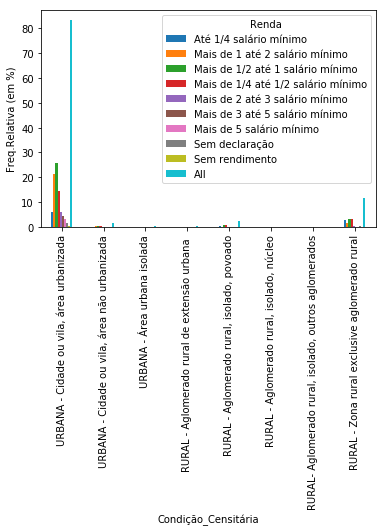

In [33]:
plot = Condição_censitária_renda[:-1].plot(kind='bar')
plt.ylabel('Freq.Relativa (em %)')

# Gráfico que relaciona : Condição Censitária com Região

In [29]:
#Código Crosstab teste ,que relaciona Região com Código de Situação Censitária

dados_não_nulos.loc[(dados_não_nulos.UF=='Norte') | (dados_não_nulos.V4728=="URBANA - Cidade ou vila, área urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Nordeste') | (dados_não_nulos.V4728=="URBANA - Cidade ou vila, área urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sul') | (dados_não_nulos.V4728=="URBANA - Cidade ou vila, área urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sudeste') | (dados_não_nulos.V4728=="URBANA - Cidade ou vila, área urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Centroeste') | (dados_não_nulos.V4728=="URBANA - Cidade ou vila, área urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'


dados_não_nulos.loc[(dados_não_nulos.UF=='Norte') | (dados_não_nulos.V4728=="URBANA - Cidade ou vila, área não urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Nordeste') | (dados_não_nulos.V4728=="URBANA - Cidade ou vila, área não urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sul') | (dados_não_nulos.V4728=="URBANA - Cidade ou vila, área não urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sudeste') | (dados_não_nulos.V4728=="URBANA - Cidade ou vila, área não urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Centroeste') | (dados_não_nulos.V4728=="URBANA - Cidade ou vila, área não urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'


dados_não_nulos.loc[(dados_não_nulos.UF=='Norte') | (dados_não_nulos.V4728=="URBANA - Área urbana isolada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Nordeste') | (dados_não_nulos.V4728=="URBANA - Área urbana isolada"), 'RegiãoCondiçãoCensitária'] =  'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sul') | (dados_não_nulos.V4728=="URBANA - Área urbana isolada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sudeste') | (dados_não_nulos.V4728=="URBANA - Área urbana isolada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Centroeste') | (dados_não_nulos.V4728=="URBANA - Área urbana isolada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'


dados_não_nulos.loc[(dados_não_nulos.UF=='Norte') | (dados_não_nulos.V4728=="RURAL - Aglomerado rural de extensão urbana "), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Nordeste') | (dados_não_nulos.V4728=="RURAL - Aglomerado rural de extensão urbana "), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sul') | (dados_não_nulos.V4728=="RURAL - Aglomerado rural de extensão urbana "), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sudeste') | (dados_não_nulos.V4728=="RURAL - Aglomerado rural de extensão urbana "), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Centroeste') | (dados_não_nulos.V4728=="RURAL - Aglomerado rural de extensão urbana "), 'RegiãoCondiçãoCensitária'] = 'Rural'

dados_não_nulos.loc[(dados_não_nulos.UF=='Norte') | (dados_não_nulos.V4728=="RURAL - Aglomerado rural, isolado, povoado"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Nordeste') | (dados_não_nulos.V4728=="RURAL - Aglomerado rural, isolado, povoado"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sul') | (dados_não_nulos.V4728=="RURAL - Aglomerado rural, isolado, povoado"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sudeste') | (dados_não_nulos.V4728=="RURAL - Aglomerado rural, isolado, povoado"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Centroeste') | (dados_não_nulos.V4728=="RURAL - Aglomerado rural, isolado, povoado"), 'RegiãoCondiçãoCensitária'] = 'Rural'

dados_não_nulos.loc[(dados_não_nulos.UF=='Norte') | (dados_não_nulos.V4728=="RURAL - Aglomerado rural, isolado, núcleo"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Nordeste') | (dados_não_nulos.V4728=="RURAL - Aglomerado rural, isolado, núcleo"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sul') | (dados_não_nulos.V4728=="RURAL - Aglomerado rural, isolado, núcleo"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sudeste') | (dados_não_nulos.V4728=="RURAL - Aglomerado rural, isolado, núcleo"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Centroeste') | (dados_não_nulos.V4728=="RURAL - Aglomerado rural, isolado, núcleo"), 'RegiãoCondiçãoCensitária'] = 'Rural'

dados_não_nulos.loc[(dados_não_nulos.UF=='Norte') | (dados_não_nulos.V4728=="RURAL- Aglomerado rural, isolado, outros aglomerados"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Nordeste') | (dados_não_nulos.V4728=="RURAL- Aglomerado rural, isolado', outros aglomerados"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sul') | (dados_não_nulos.V4728=="RURAL- Aglomerado rural, isolado, outros aglomerados"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sudeste') | (dados_não_nulos.V4728=="RURAL- Aglomerado rural, isolado, outros aglomerados"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Centroeste') | (dados_não_nulos.V4728=="RURAL- Aglomerado rural, isolado, outros aglomerados"), 'RegiãoCondiçãoCensitária'] = 'Rural'

dados_não_nulos.loc[(dados_não_nulos.UF=='Norte') | (dados_não_nulos.V4728=="RURAL - Zona rural exclusive aglomerado rural"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Nordeste') | (dados_não_nulos.V4728=="RURAL - Zona rural exclusive aglomerado rural"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sul') | (dados_não_nulos.V4728=="RURAL - Zona rural exclusive aglomerado rural"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sudeste') | (dados_não_nulos.V4728=="RURAL - Zona rural exclusive aglomerado rural"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Centroeste') | (dados_não_nulos.V4728=="RURAL - Zona rural exclusive aglomerado rural"), 'RegiãoCondiçãoCensitária'] = 'Rural'

dados_não_nulos.head()

AttributeError: 'DataFrame' object has no attribute 'V4728'

In [ ]:
#Fazer algo para tirar os NANS(por enquanto eles simbolizam zero-0)
# Na coluna Condição domiciliar ficar só com Pessoa de referência e Filho
# Como restringir a idade dos filhos sem alterar a idade dos pais? Precisa de filhos com idade inferior a 14 anos
# Fazer um gráfico que relaciona pais com estudo
# Fazer um gráfico que relaciona estudo dos pais e renda
# Fazer um gráfico que relaciona estudo dos pais com o índice de trabalho infantil
# Fazer um gráfico que relaciona trabalho infantil com renda (Para isso eu tenho que ter a relação de crianças que trabalham)
# Fazer um gráfico que relaciona trabalho infantil com Região 
# Fazer um gráfico que relaciona região com Condição Censitária
# Fazer um gráfico que relaciona trabalho infantil com Condição Censitária
# Fazer um gráfico que relaciona trabalho infantil rural e trabalho urbano, mostrando índices


___
## Análise e Resultados

___
## Conclusão 

Descreva aqui suas conclusões!